<a href="https://colab.research.google.com/github/emretezisci/Hello-World-/blob/master/UST_TRY_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics
from fbprophet.diagnostics import cross_validation
from fbprophet.plot import plot_cross_validation_metric
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.plot import plot_yearly

In [0]:
# Create a datetime object with today's value
today = datetime.datetime.today() 

# Add one day to today's date
tomorrow = today + datetime.timedelta(1)

# I imported tomorrow's data because of timezome difference
startDate = '01-01-2005'
endDate = str(datetime.datetime.strftime(tomorrow,'%d-%m-%Y'))
key = ''
aggregationTypes = 'max'
frequency = '2'

# Import the data
url = "https://evds2.tcmb.gov.tr/service/evds/series=TP.DK.USD.A&startDate=" + startDate + '&endDate=' +endDate + '&type=csv' + '&key=' + key + '&aggregationTypes=' + aggregationTypes + '&frequency=' + frequency
df = pd.read_csv(url)

In [266]:
# Sort the data in descending order
df = df.sort_index(ascending=False)
df.head()

,Tarih,TP_DK_USD_A,UNIXTIME
3717,03-04-2019,5.5569,"{""numberLong"":""1554242400""}"
3716,02-04-2019,5.5986,"{""numberLong"":""1554156000""}"
3715,01-04-2019,5.6284,"{""numberLong"":""1554069600""}"
3714,29-03-2019,5.5423,"{""numberLong"":""1553814000""}"
3713,28-03-2019,5.3307,"{""numberLong"":""1553727600""}"


In [267]:
# Rename necessary columns and remove unnecessary one
df = df.rename(columns={"Tarih": "ds", "TP_DK_USD_A": "y"})
df.drop('UNIXTIME', axis=1, inplace=True)
df.head()

,ds,y
3717,03-04-2019,5.5569
3716,02-04-2019,5.5986
3715,01-04-2019,5.6284
3714,29-03-2019,5.5423
3713,28-03-2019,5.3307


In [268]:
# Fit the mode
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [269]:
# Predict the future
# The predict method will assign each row in future a predicted value which it names yhat. 
# If you pass in historical dates, it will provide an in-sample fit.
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
4078,2020-11-28
4079,2020-11-29
4080,2020-11-30
4081,2020-12-01
4082,2020-12-02


In [270]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
4078,2020-11-28,6.802511,6.481352,7.133012
4079,2020-11-29,6.778823,6.452522,7.117440
4080,2020-11-30,6.807987,6.481349,7.160306
4081,2020-12-01,6.799843,6.466796,7.153092
4082,2020-12-02,6.802777,6.483119,7.148686


In [271]:
# Horizon of 365 days, starting with 730 days of training data in the first cutoff and then making predictions every 180 days.
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.tail()

INFO:fbprophet:Making 25 forecasts with cutoffs between 2007-02-04 00:00:00 and 2018-12-03 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
6061,2019-11-01,5.714875,5.375847,6.051210,5.4626,2018-12-03
6062,2019-11-02,5.711181,5.378829,6.029396,5.2438,2018-12-03
6063,2019-11-03,5.682896,5.347534,6.000911,5.4544,2018-12-03
6064,2019-12-02,5.766712,5.417619,6.084566,5.2556,2018-12-03
6065,2019-12-03,5.760029,5.415940,6.086862,5.4345,2018-12-03


In [272]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
2285,36 days,0.080551,0.283815,0.151073,0.057204,0.603960
277,36 days,0.080553,0.283818,0.151105,0.057231,0.603960
4042,36 days,0.080364,0.283485,0.150596,0.057088,0.605611
4799,36 days,0.080227,0.283244,0.150160,0.056978,0.607261
4296,36 days,0.080136,0.283083,0.149950,0.056936,0.607261


In [273]:
np.mean(df_p['mape'])

0.09270908182846564

In [274]:
np.mean(df_p['rmse'])

0.37245257120618114

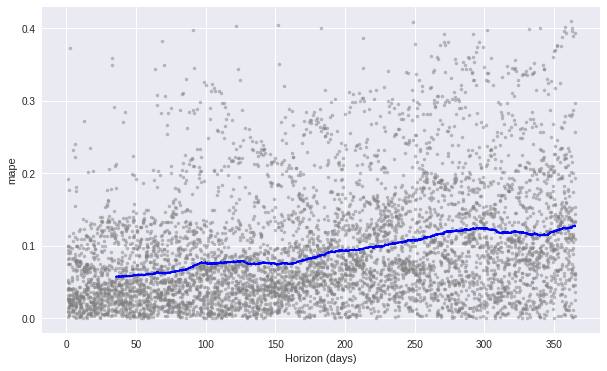

In [275]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

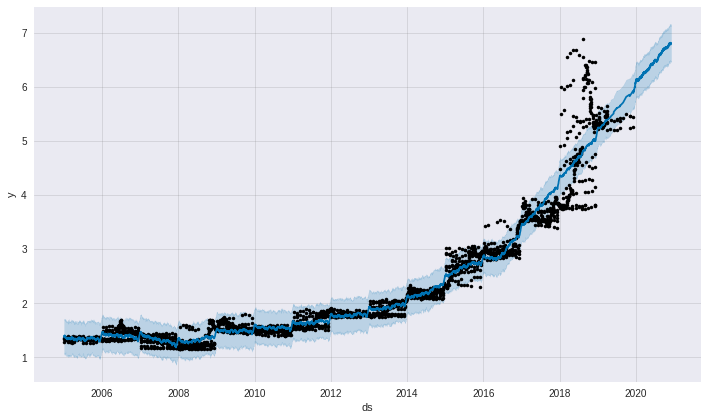

In [276]:
# Plot the forecast
fig1 = m.plot(forecast)

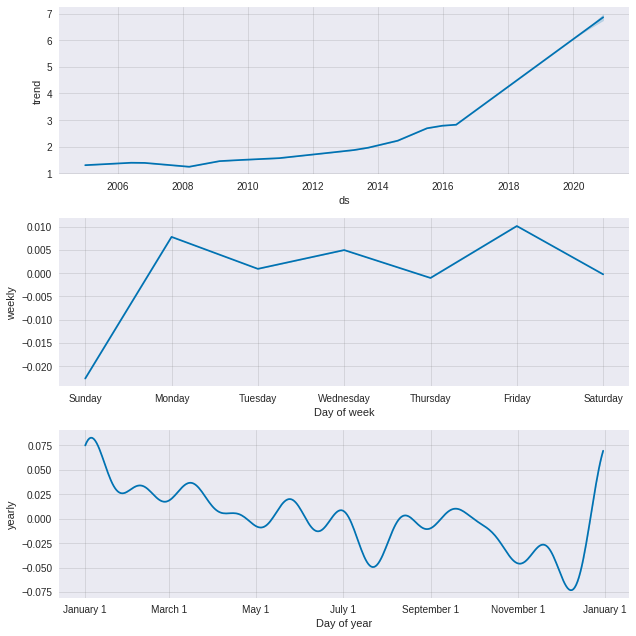

In [277]:
# Display trend, yearly seasonality, and weekly seasonality
fig1_1 = m.plot_components(forecast)

Red = Predicted Values, Blue = Base Values


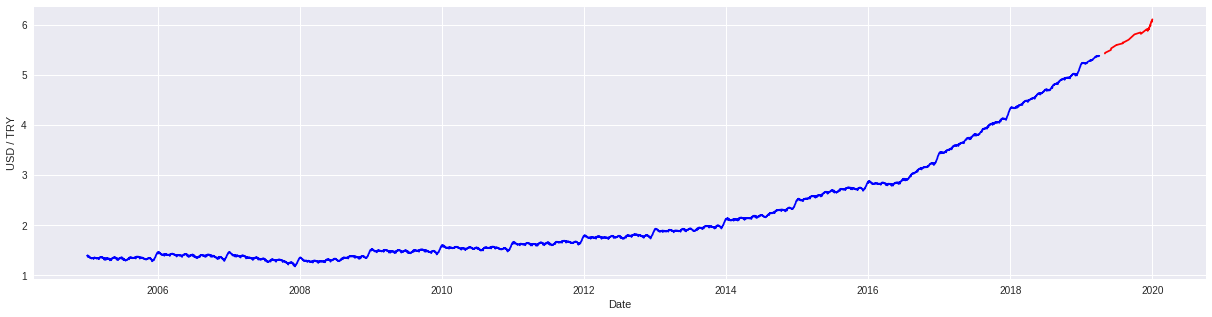

In [278]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2019-04-03") & (forecastnew['ds'] <= "2020-01-01")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2005-01-03") & (forecastnew['ds'] <= "2019-04-03")
forecastnew = forecastnew.loc[mask]

fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('USD / TRY')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


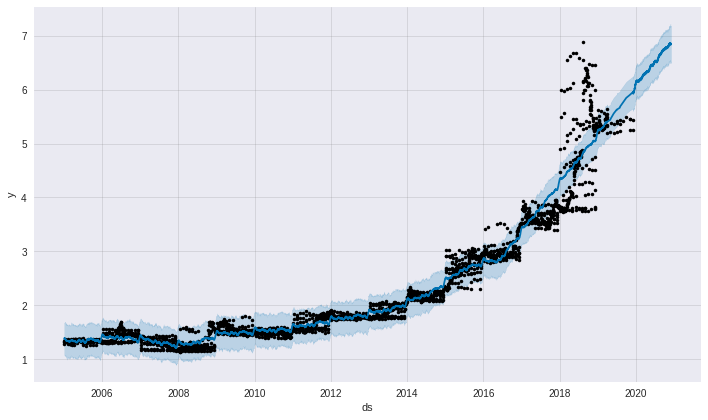

In [279]:
# Try without the weekend data
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.dayofweek < 5]
m2 = Prophet().fit(df2)
future2 = m2.make_future_dataframe(periods=365, freq='D')
forecast2 = m2.predict(future2)
fig2 = m.plot(forecast2)

In [280]:
forecast2[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3682,2020-11-28,6.830851,6.487833,7.167926
3683,2020-11-29,6.829653,6.487568,7.166587
3684,2020-11-30,6.854392,6.520085,7.185699
3685,2020-12-01,6.846460,6.511150,7.174750
3686,2020-12-02,6.849953,6.516657,7.169254


In [281]:
df_cv2 = cross_validation(m2, initial='730 days', period='180 days', horizon = '365 days')
df_cv2.tail()

INFO:fbprophet:Making 25 forecasts with cutoffs between 2007-02-04 00:00:00 and 2018-12-03 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
5431,2019-08-02,5.553027,5.229357,5.865296,5.2407,2018-12-03
5432,2019-10-01,5.703087,5.381513,6.034786,5.4973,2018-12-03
5433,2019-11-01,5.747683,5.424388,6.078231,5.4626,2018-12-03
5434,2019-12-02,5.806003,5.501038,6.127174,5.2556,2018-12-03
5435,2019-12-03,5.800191,5.454880,6.151207,5.4345,2018-12-03


In [282]:
df_p2 = performance_metrics(df_cv2)
df_p2.head()

,horizon,mse,rmse,mae,mape,coverage
4526,36 days,0.067581,0.259963,0.145535,0.056056,0.583794
5197,36 days,0.070044,0.264659,0.147636,0.056433,0.581952
4749,36 days,0.070047,0.264664,0.147697,0.056442,0.581952
19,36 days,0.070126,0.264814,0.148037,0.056733,0.580110
3851,36 days,0.070134,0.264828,0.148062,0.056658,0.580110


In [283]:
np.mean(df_p2['mape'])

0.09723144603334301

In [284]:
np.mean(df_p2['rmse'])

0.3765445375141801

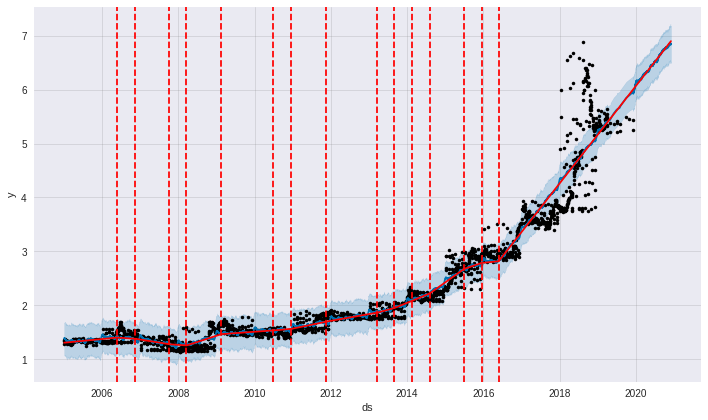

In [285]:
fig2 = m2.plot(forecast2)
a = add_changepoints_to_plot(fig2.gca(), m2, forecast2)

Red = Predicted Values, Blue = Base Values


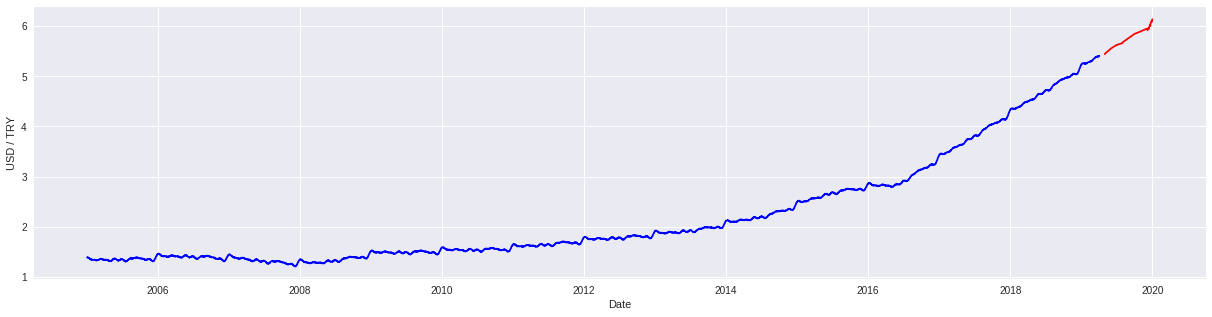

In [286]:
forecastnew = forecast2['ds']
forecastnew2 = forecast2['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2019-04-03") & (forecastnew['ds'] <= "2020-01-01")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2005-01-03") & (forecastnew['ds'] <= "2019-04-03")
forecastnew = forecastnew.loc[mask]

fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('USD / TRY')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

In [287]:
# Try with different interval widt and seasonality
df3 = df.copy()
df3['ds'] = pd.to_datetime(df3['ds'])
df3 = df3[df3['ds'].dt.dayofweek < 5]
m3 = Prophet(interval_width=0.75, yearly_seasonality=False, weekly_seasonality=False, changepoint_range=1) .fit(df3)
future3 = m3.make_future_dataframe(freq='D', periods=5)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
4078,2020-11-28
4079,2020-11-29
4080,2020-11-30
4081,2020-12-01
4082,2020-12-02


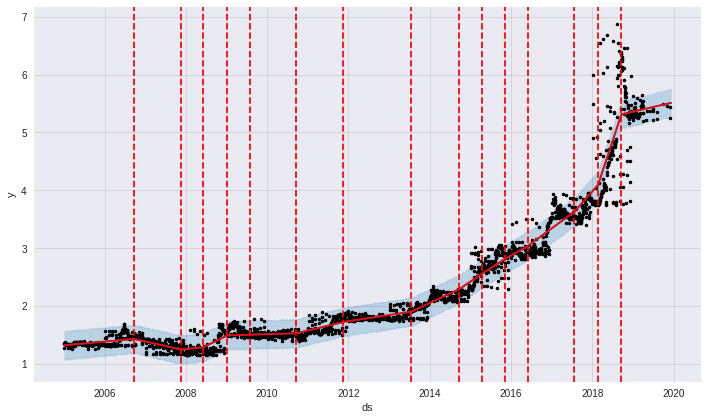

In [288]:
forecast3 = m3.predict(future3)
fig3 = m3.plot(forecast3)
a = add_changepoints_to_plot(fig3.gca(), m3, forecast3)

In [289]:
forecast3[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3322,2019-12-04,5.509585,5.253362,5.741191
3323,2019-12-05,5.510031,5.278725,5.760592
3324,2019-12-06,5.510478,5.252409,5.758785
3325,2019-12-07,5.510924,5.265904,5.749376
3326,2019-12-08,5.511370,5.273078,5.740510


In [290]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv3 = cross_validation(m3, initial = '730 days', period = '180 days', horizon = '365 days')

INFO:fbprophet:Making 25 forecasts with cutoffs between 2007-02-04 00:00:00 and 2018-12-03 00:00:00


In [291]:
df_p3 = performance_metrics(df_cv3)
df_p3.head()

,horizon,mse,rmse,mae,mape,coverage
4526,36 days,0.068000,0.260768,0.134539,0.048017,0.646409
5197,36 days,0.068970,0.262621,0.135849,0.048247,0.644567
4749,36 days,0.069117,0.262901,0.136348,0.048375,0.642726
19,36 days,0.069187,0.263034,0.136632,0.048619,0.640884
3851,36 days,0.069181,0.263023,0.136578,0.048561,0.640884


In [292]:
np.mean(df_p3['mape'])

0.09655460790694347

In [293]:
np.mean(df_p3['rmse'])

0.3926255404429865

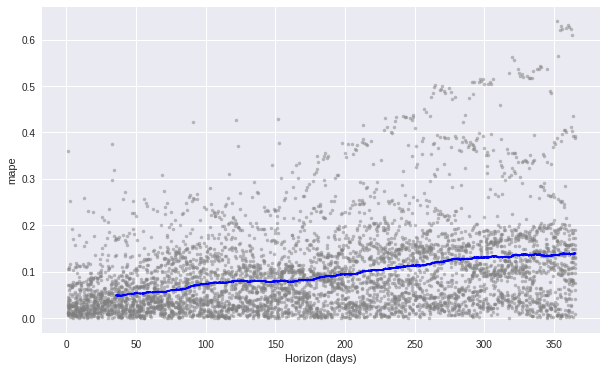

In [294]:
fig3_1 = plot_cross_validation_metric(df_cv3, metric='mape')

Red = Predicted Values, Blue = Base Values


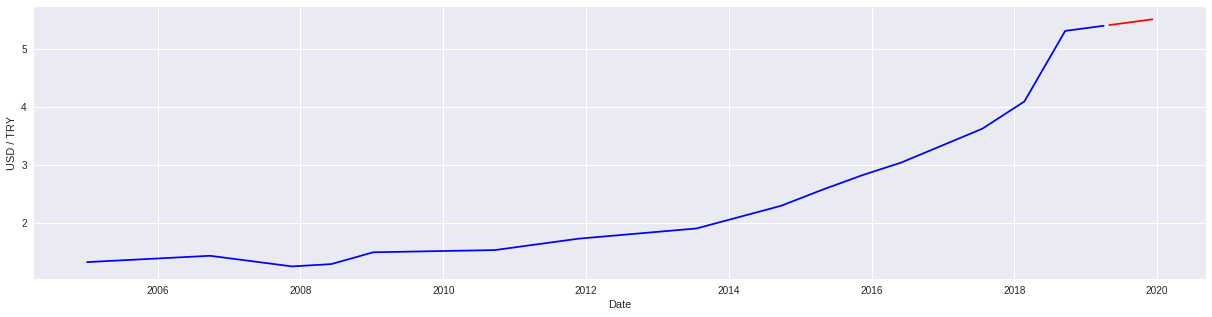

In [295]:
forecastnew = forecast3['ds']
forecastnew2 = forecast3['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2019-04-03") & (forecastnew['ds'] <= "2020-01-01")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2005-01-03") & (forecastnew['ds'] <= "2019-04-03")
forecastnew = forecastnew.loc[mask]

fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('USD / TRY')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


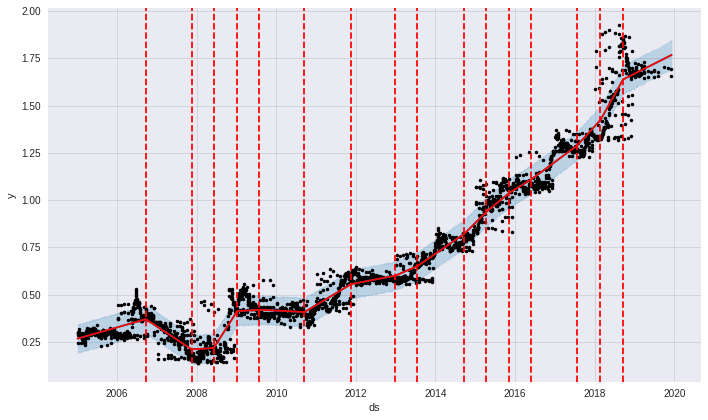

In [296]:
# Try taking log of values
df4 = df.copy()
df4['ds'] = pd.to_datetime(df3['ds'])
df4 = df4[df4['ds'].dt.dayofweek < 5]
df4['y'] = np.log(df4['y'])
m4 = Prophet(interval_width=0.77, yearly_seasonality=False, weekly_seasonality=False, changepoint_range=1) .fit(df4)
future4 = m4.make_future_dataframe(freq='D', periods=5)
forecast4 = m4.predict(future4)
fig4 = m4.plot(forecast4)
a = add_changepoints_to_plot(fig4.gca(), m4, forecast4)


In [297]:
forecast4[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
3322,2019-12-04,1.766946,1.695730,1.847106
3323,2019-12-05,1.767237,1.695836,1.841307
3324,2019-12-06,1.767529,1.693814,1.838931
3325,2019-12-07,1.767820,1.691322,1.844204
3326,2019-12-08,1.768112,1.692534,1.848034


In [298]:
df_cv4 = cross_validation(m4, initial = '730 days', period = '180 days', horizon = '365 days')

INFO:fbprophet:Making 25 forecasts with cutoffs between 2007-02-04 00:00:00 and 2018-12-03 00:00:00


In [299]:
df_p4 = performance_metrics(df_cv4)
df_p4.head()

,horizon,mse,rmse,mae,mape,coverage
4526,36 days,0.005830,0.076356,0.054283,0.090264,0.710866
5197,36 days,0.005885,0.076711,0.054561,0.090326,0.709024
4749,36 days,0.005892,0.076761,0.054658,0.090267,0.709024
19,36 days,0.005947,0.077119,0.054936,0.092059,0.707182
3851,36 days,0.005925,0.076975,0.054734,0.091545,0.709024


In [300]:
np.mean(df_p4['mape'])

0.18155223861719094

In [301]:
np.mean(df_p4['rmse'])

0.12790528458989775

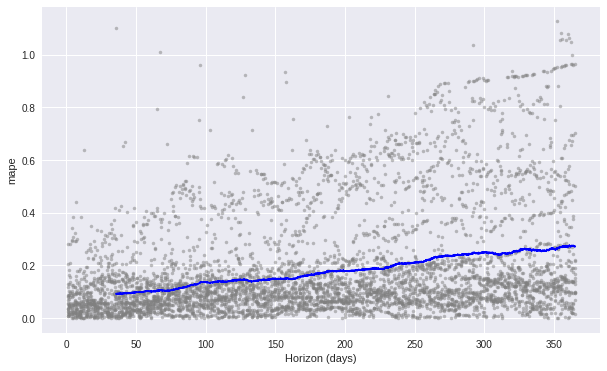

In [302]:
fig4 = plot_cross_validation_metric(df_cv4, metric='mape')

Red = Predicted Values, Blue = Base Values


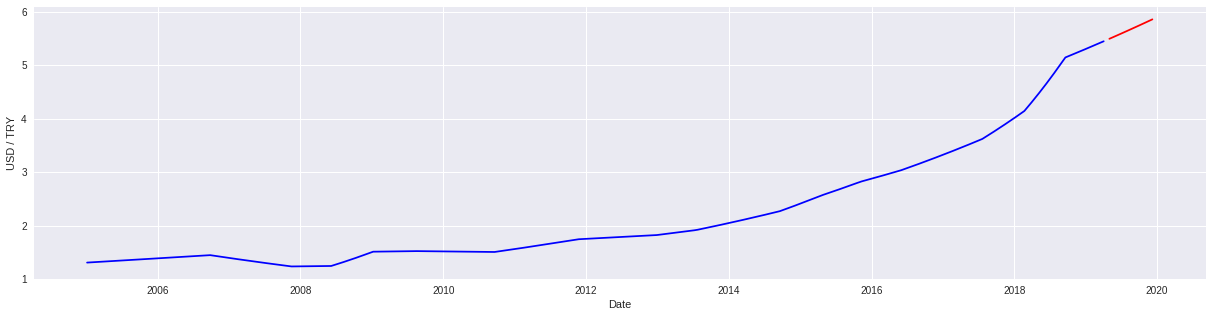

In [303]:
forecastnew = forecast4['ds']
forecastnew2 = forecast4['yhat']
forecastnew2 = np.exp(forecastnew2)

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2019-04-03") & (forecastnew['ds'] <= "2020-01-01")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2005-01-03") & (forecastnew['ds'] <= "2019-04-03")
forecastnew = forecastnew.loc[mask]

fig, ax1 = plt.subplots(figsize=(21, 5))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('USD / TRY')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")